# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import hvplot.pandas
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore") 
import re
import numpy
from dateutil.relativedelta import relativedelta

# Import Data

In [2]:
data = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [4]:
data.shape

(466285, 75)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
data.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

Dapat kita lihat bahwa dataset yang kita gunakan terdiri dari 466.285 kolom dan 75 baris. dari dataset tersebut terdapat beberapa kolom yang benar benar kosong, diantaranya `annual_inc_joint`, `dti_joint`, `verification_status_joint `, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `all_util`, `inq_fi`, `total_cu_tl`, `inq_last_12m`. Selain kolom yang benar-benar kosong, ada juga kolom `Unnamed: 0` yang berisi nomor index. Kolom-kolom yang kita mention sebelumnya akan kita hapus karena tidak memiliki impact pada data.

In [7]:
cols_to_drop = [
    'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
## 
    , 'Unnamed: 0'
    , 'id'
    , 'member_id'
    , 'url'
    , 'desc'
    , 'sub_grade'
]

data = data.drop(cols_to_drop, axis=1)

# Exploratory Data Analysis

### Define Target Variable

In [8]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` (peminjam yang buruk) atau `good loan` (peminjam yang baik)

In [9]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
    , 'Late (16-30 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

#Drop kolom loan_status
data.drop('loan_status', axis=1, inplace=True)

In [10]:
round(data['bad_flag'].value_counts(normalize=True)*100, 2)

0    88.81
1    11.19
Name: bad_flag, dtype: float64

Setelah melakukan pembagian antara bad/good loan.dapat terlihat individu yang ditandai sebagai bad loan jauh lebih sedikit dari good loan. Hal ini dapat kita sebut sebagai inballance dataset

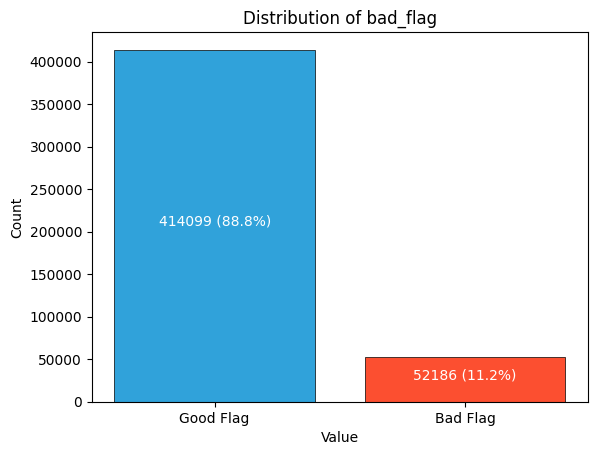

In [11]:
# Menghitung jumlah masing-masing nilai pada kolom bad_flag
counts = data['bad_flag'].value_counts()

# Menghitung persentase masing-masing nilai pada kolom bad_flag
percentages = counts.values / counts.values.sum() * 100

# Membuat bar plot
plt.bar(counts.index, counts.values, color=['#30A2DA', '#FC4F30'],edgecolor='black',  linewidth=0.5)

# Menambahkan keterangan jumlah dan persentase pada setiap bar
for i, count in enumerate(counts):
    plt.text(i, count / 2, f'{count} ({percentages[i]:.1f}%)', ha='center', color='white')

# Memberikan label pada sumbu x dan y serta judul
plt.xticks([0, 1], ['Good Flag', 'Bad Flag'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of bad_flag')

# Menampilkan plot
plt.show()


<AxesSubplot: >

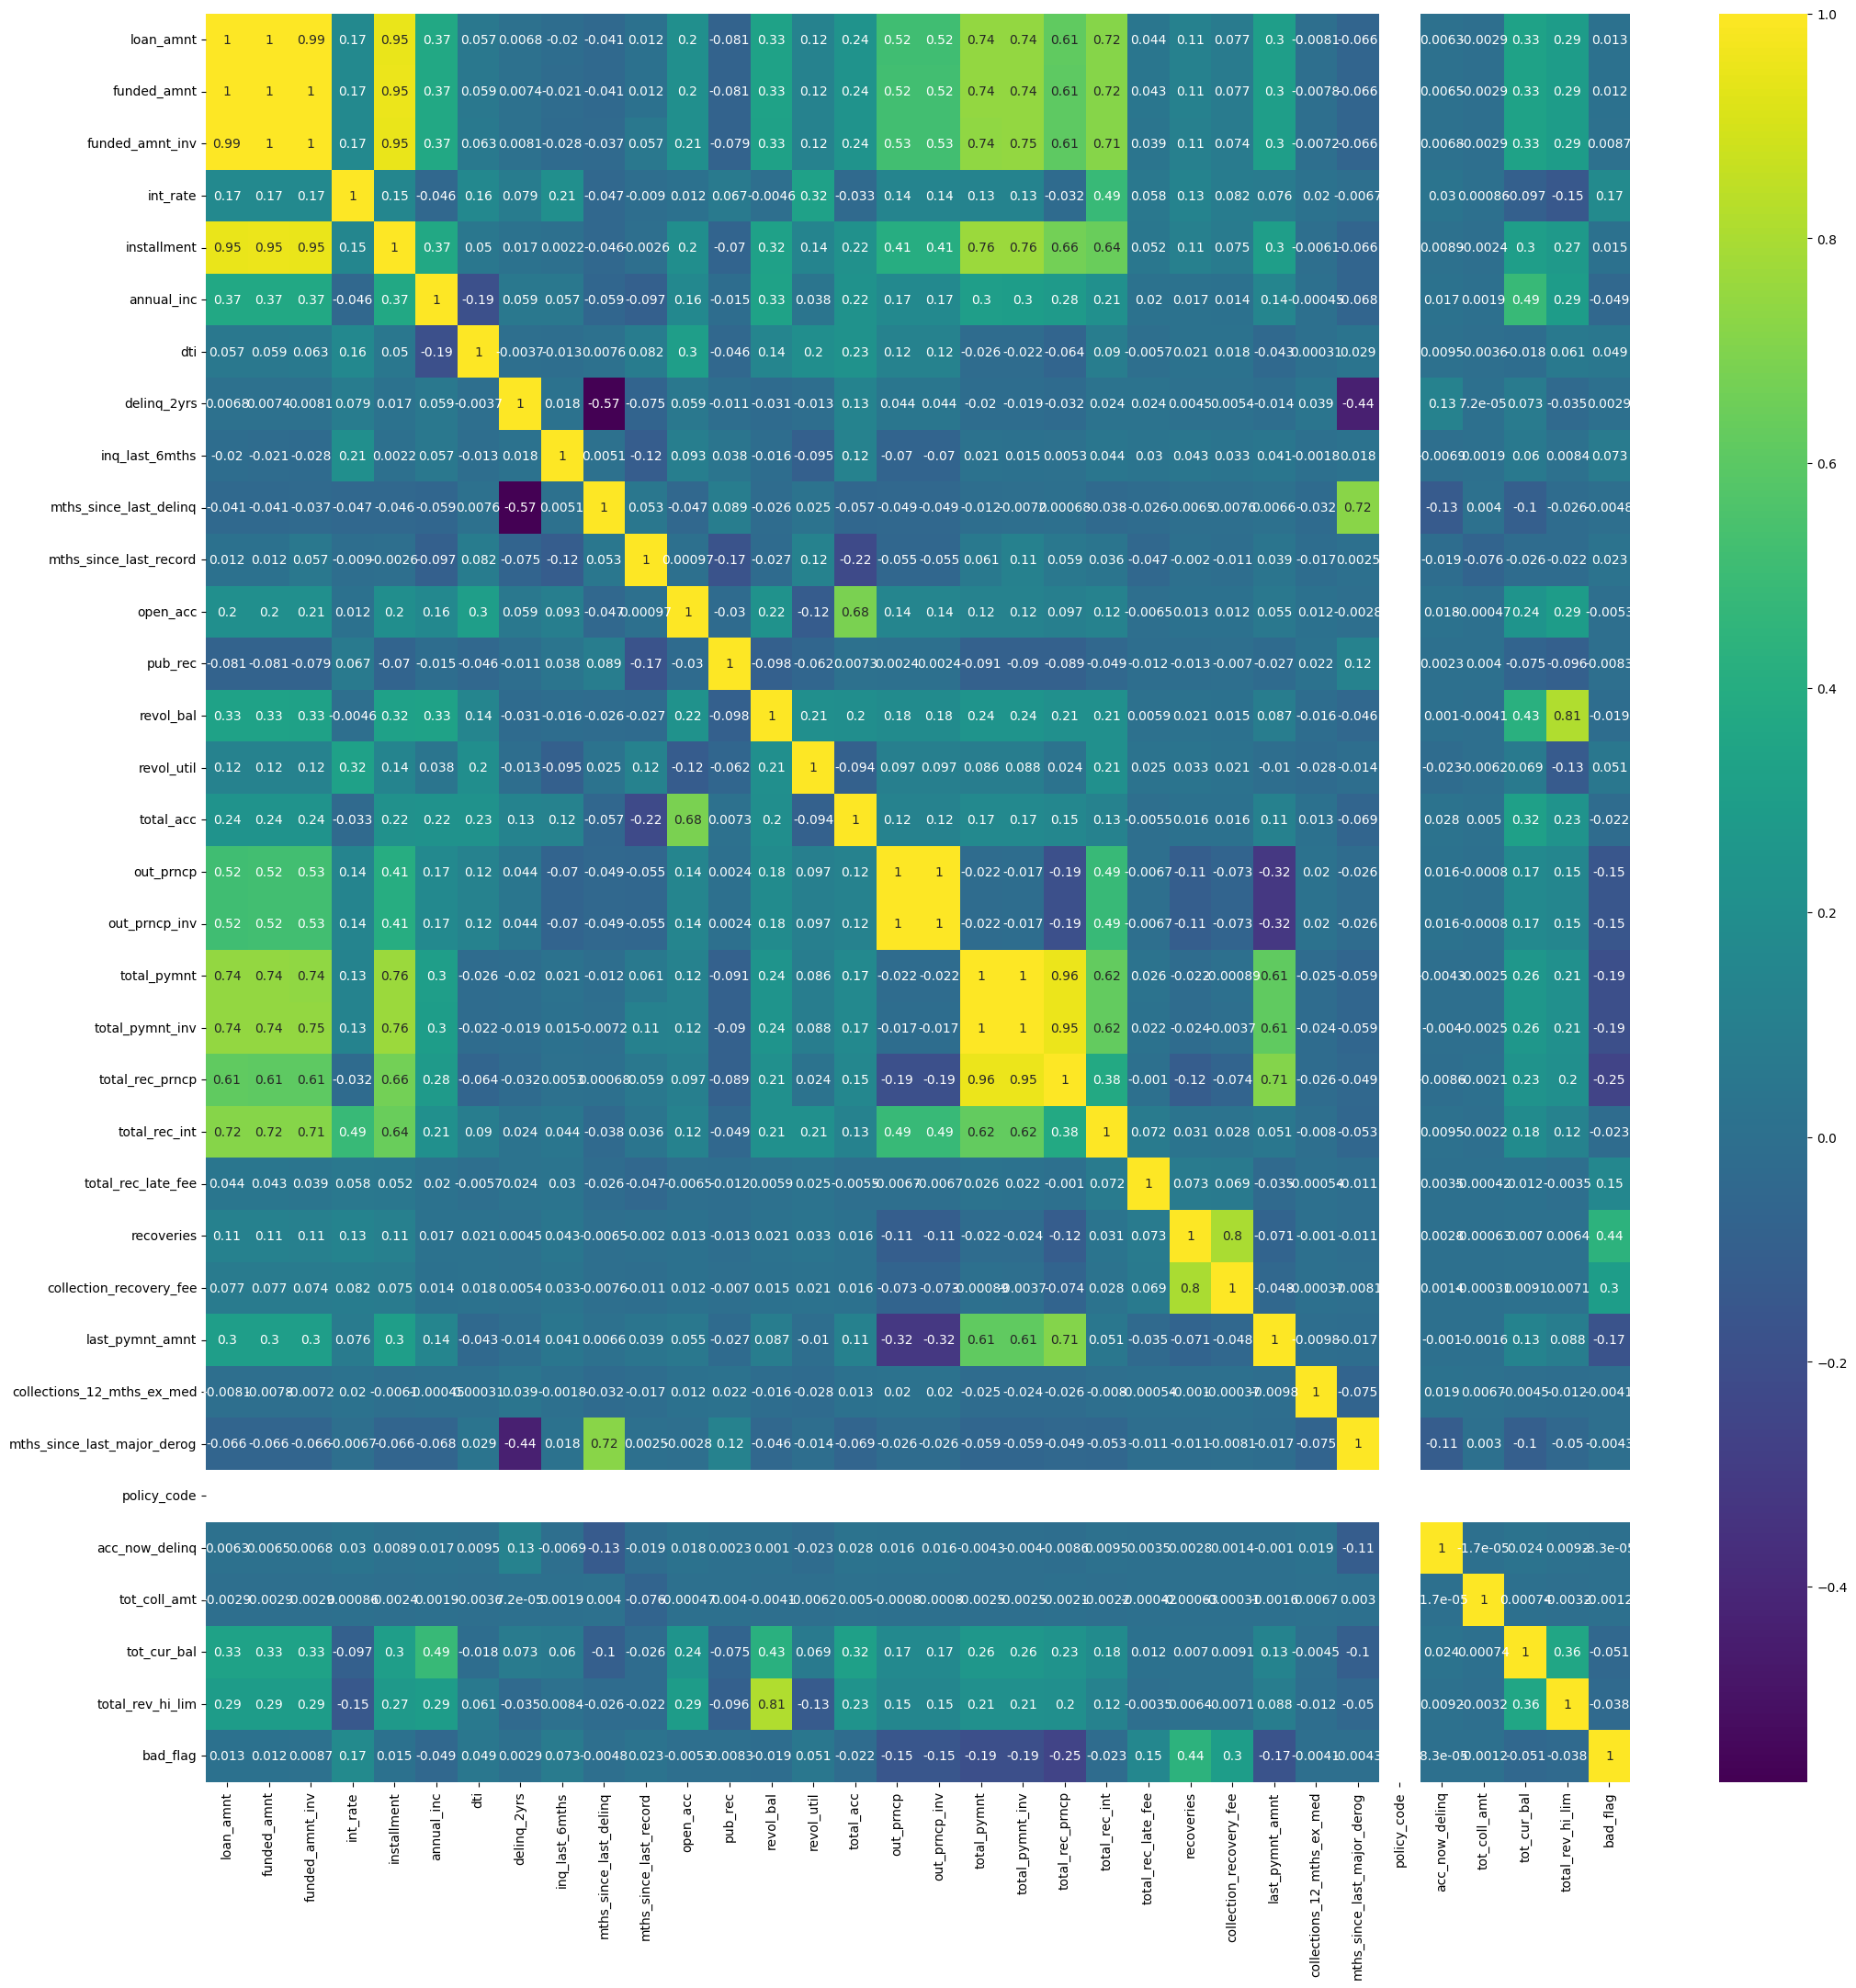

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True, cmap='viridis')

### Grade

<Figure size 3000x3000 with 0 Axes>

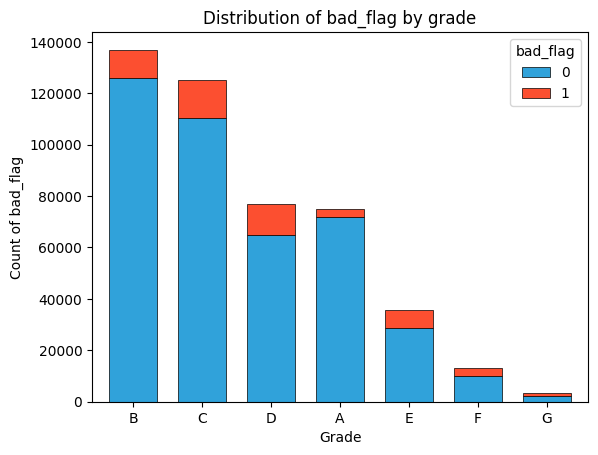

In [13]:
# Menghitung nilai 'bad_flag' untuk setiap nilai pada kolom 'grade'
counts = data.groupby('grade')['bad_flag'].value_counts().unstack(fill_value=0)
counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

# Membuat bar plot
plt.figure(figsize=(30,30))
counts.plot(kind='bar', stacked=True, color=['#30A2DA', '#FC4F30'],edgecolor='black',  linewidth=0.5, width=0.7)

# Memberikan label pada sumbu x dan y serta judul
plt.xticks(rotation=0)
plt.xlabel('Grade')
plt.ylabel('Count of bad_flag')
plt.title('Distribution of bad_flag by grade')

# Menampilkan plot
plt.show()


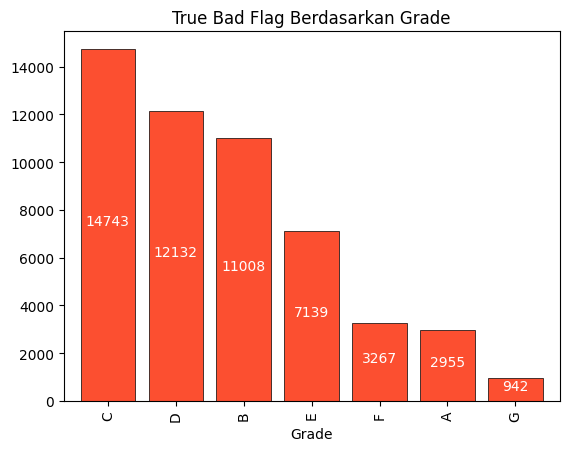

In [14]:

# Menghitung jumlah 'bad_flag' dengan nilai 1 berdasarkan kolom 'grade'
counts = data[data['bad_flag'] == 1]['grade'].value_counts()

# Membuat bar plot
counts.plot(kind='bar', color='#FC4F30',edgecolor='black',  linewidth=0.5, width=0.8)
plt.xlabel('Grade')
plt.title('True Bad Flag Berdasarkan Grade')

for i, v in enumerate(counts):
    plt.text(i, v/2, str(v), ha='center', color='white')

plt.show()

### Home OwnerShip

In [15]:
table = pd.crosstab(data['home_ownership'], data['bad_flag'])
table['total'] = table.sum(axis=1)

# Sorting berdasarkan jumlah total dari terbesar ke terkecil
table = table.sort_values(by='total', ascending=False)
table['bad_rate'] = round(table[1] / sum(table['total']) * 100, 3)

print(table)

bad_flag             0      1   total  bad_rate
home_ownership                                 
MORTGAGE        212628  23247  235875     4.986
RENT            164223  24250  188473     5.201
OWN              37061   4643   41704     0.996
OTHER              144     38     182     0.008
NONE                42      8      50     0.002
ANY                  1      0       1     0.000


### Term 

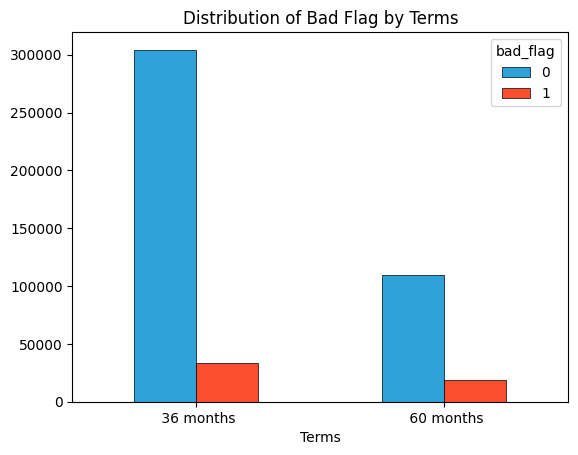

In [16]:
# Menghitung nilai 'bad_flag' untuk setiap nilai pada kolom 'grade'
counts = data.groupby('term')['bad_flag'].value_counts().unstack(fill_value=0)
counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

# Membuat bar plot
counts.plot(kind='bar', stacked=False, color=['#30A2DA', '#FC4F30'],edgecolor='black',  linewidth=0.5)

# Memberikan label pada sumbu x dan y serta judul
plt.xticks(rotation=0)
plt.xlabel('Terms')
plt.title('Distribution of Bad Flag by Terms')


# Menampilkan plot
plt.show()

### Purpose

In [17]:
table = pd.crosstab(data['purpose'], data['bad_flag'])
table['total'] = table.sum(axis=1)

# Sorting berdasarkan jumlah total dari terbesar ke terkecil
table = table.sort_values(by='total', ascending=False)
table['bad_rate'] = round(table[1] / sum(table['total']) * 100, 3)

print(table)

bad_flag                 0      1   total  bad_rate
purpose                                            
debt_consolidation  242359  31836  274195     6.828
credit_card          94957   9200  104157     1.973
home_improvement     23865   2672   26537     0.573
other                20351   3339   23690     0.716
major_purchase        8866    962    9828     0.206
small_business        5467   1546    7013     0.332
car                   4909    488    5397     0.105
medical               3978    624    4602     0.134
moving                2529    465    2994     0.100
vacation              2182    305    2487     0.065
wedding               2058    285    2343     0.061
house                 1947    322    2269     0.069
educational            334     88     422     0.019
renewable_energy       297     54     351     0.012


### Verification Status

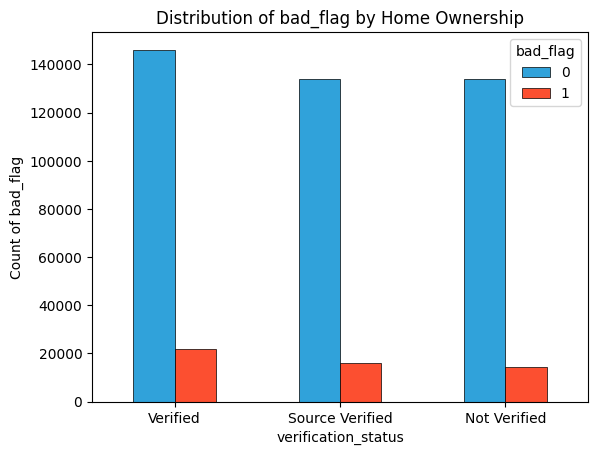

In [18]:
# Menghitung nilai 'bad_flag' untuk setiap nilai pada kolom 'verification_status'
counts = data.groupby('verification_status')['bad_flag'].value_counts().unstack(fill_value=0)
counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

# Membuat bar plot
counts.plot(kind='bar', stacked=False, color=['#30A2DA', '#FC4F30'],edgecolor='black',  linewidth=0.5)

# Memberikan label pada sumbu x dan y serta judul
plt.xticks(rotation=0)

plt.ylabel('Count of bad_flag')
plt.title('Distribution of bad_flag by Home Ownership')

# Menampilkan plot
plt.show()

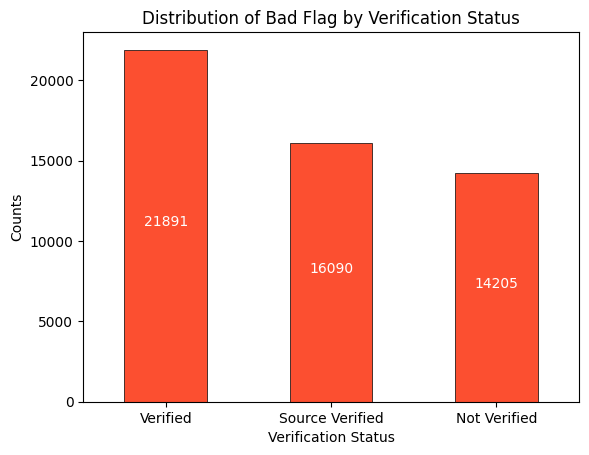

In [19]:
# Menghitung jumlah 'bad_flag' dengan nilai 1 berdasarkan kolom 'grade'
counts = data[data['bad_flag'] == 1]['verification_status'].value_counts()

# Membuat bar plot
counts.plot(kind='bar', stacked=False, color=[ '#FC4F30'], edgecolor='black', linewidth=0.5)

# Menambahkan nilai count di tengah bar plot
for i, v in enumerate(counts):
    plt.text(i, v/2, str(v), ha='center', color='white')

# Memberikan label pada sumbu x dan y serta judul
plt.xticks(rotation=0)
plt.xlabel('Verification Status')
plt.ylabel('Counts')
plt.title('Distribution of Bad Flag by Verification Status')

# Menampilkan plot
plt.show()


### Emp Length

In [20]:
table = pd.crosstab(data['emp_length'], data['bad_flag'])
table['total'] = table.sum(axis=1)

# Sorting berdasarkan jumlah total dari terbesar ke terkecil
table = table.sort_values(by='total', ascending=False)
table['bad_rate'] = round(table[1] / sum(table['total']) * 100, 3)

print(table)

bad_flag         0      1   total  bad_rate
emp_length                                 
10+ years   134724  15325  150049     3.442
2 years      36726   4647   41373     1.044
3 years      32488   4108   36596     0.923
< 1 year     31838   4427   36265     0.994
5 years      27163   3611   30774     0.811
1 year       26236   3386   29622     0.760
4 years      24872   3151   28023     0.708
7 years      23201   2979   26180     0.669
6 years      22996   3116   26112     0.700
8 years      19880   2515   22395     0.565
9 years      15822   2066   17888     0.464


### Emp_title

In [21]:
data['emp_title'].value_counts()

Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: emp_title, Length: 205475, dtype: int64

In [22]:
data.drop('emp_title', axis=1, inplace=True)

### Title

In [23]:
data['title'].value_counts()

Debt consolidation                   164075
Credit card refinancing               62275
Debt Consolidation                    15760
Home improvement                      14849
Other                                 12713
                                      ...  
Credit Card Clearance                     1
credit repayment                          1
medical bills/credit card payoff          1
One Time Only Relief!                     1
Paying off the car and some bills         1
Name: title, Length: 63099, dtype: int64

### Transforming

In [24]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [25]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
def extract_numbers(string):
    if pd.isnull(string) or string is None:
        return None
    elif string == '< 1 year':
        return '0'
    else:
        match = re.search(r'\d+', string)
        if match:
            number = re.sub(r'[^\d]', '', match.group())
            return number
        else:
            return None

In [27]:
data['term_int'] = data['term'].apply(extract_numbers)
data['term_int'] = data['term_int'].astype(float)
data.drop('term', axis=1, inplace=True)

In [28]:
data['emp_length_int'] = data['emp_length'].apply(extract_numbers)
data['emp_length_int'] = data['emp_length_int'].astype(float)
data.drop('emp_length', axis=1, inplace=True)

### earliest_cr_line

In [29]:
data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [30]:
def convert_date(date_str):
    date_obj = pd.to_datetime(date_str, format='%b-%y')
    year = date_obj.year
    
    if year > 2017:
        date_obj = date_obj.replace(year=year-100)
    
    return date_obj

In [31]:
data['earliest_cr_line_date'] = data['earliest_cr_line'].apply(convert_date)

In [32]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2022-05-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [33]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

In [34]:
data['issue_d_date'] = data['issue_d'].apply(convert_date)

In [35]:
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2022-05-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

In [37]:
data['last_pymnt_d_date'] = data['last_pymnt_d'].apply(convert_date)

In [38]:
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2022-05-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

### next_pymnt_d

In [39]:
data['next_pymnt_d_date'] = data['next_pymnt_d'].apply(convert_date)

In [40]:
 data['next_pymnt_d_date'].fillna(data['last_pymnt_d_date'] + pd.DateOffset(months=1),inplace=True)

In [41]:
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2022-05-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [42]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date','last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

In [43]:
data['last_credit_pull_d_date'] = data['last_credit_pull_d'].apply(convert_date)

In [44]:
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2022-05-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [45]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [46]:
data.head(20)

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0        5000         5000           4975.0     10.65       162.87     B   
1        2500         2500           2500.0     15.27        59.83     C   
2        2400         2400           2400.0     15.96        84.33     C   
3       10000        10000          10000.0     13.49       339.31     C   
4        3000         3000           3000.0     12.69        67.79     B   
5        5000         5000           5000.0      7.90       156.46     A   
6        7000         7000           7000.0     15.96       170.08     C   
7        3000         3000           3000.0     18.64       109.43     E   
8        5600         5600           5600.0     21.28       152.39     F   
9        5375         5375           5350.0     12.69       121.45     B   
10       6500         6500           6500.0     14.65       153.45     C   
11      12000        12000          12000.0     12.69       402.54     B   
12       9000         9000           9000.0     13.49       305.38     C   
13       3000         3000           3000.0      9.91        96.68     B   
14      10000        10000          10000.0     10.65       325.74     B   
15       1000         1000           1000.0     16.29        35.31     D   
16      10000        10000          10000.0     15.27       347.98     C   
17       3600         3600           3600.0      6.03       109.57     A   
18       6000         6000           6000.0     11.71       198.46     B   
19       9200         9200           9200.0      6.03       280.01     A   

   home_ownership  annual_inc verification_status pymnt_plan  \
0            RENT    24000.00            Verified          n   
1            RENT    30000.00     Source Verified          n   
2            RENT    12252.00        Not Verified          n   
3            RENT    49200.00     Source Verified          n   
4            RENT    80000.00     Source Verified          n   
5            RENT    36000.00     Source Verified          n   
6            RENT    47004.00        Not Verified          n   
7            RENT    48000.00     Source Verified          n   
8             OWN    40000.00     Source Verified          n   
9            RENT    15000.00            Verified          n   
10            OWN    72000.00        Not Verified          n   
11            OWN    75000.00     Source Verified          n   
12           RENT    30000.00     Source Verified          n   
13           RENT    15000.00     Source Verified          n   
14           RENT   100000.00     Source Verified          n   
15           RENT    28000.00        Not Verified          n   
16           RENT    42000.00        Not Verified          n   
17       MORTGAGE   110000.00        Not Verified          n   
18       MORTGAGE    84000.00            Verified          n   
19           RENT    77385.19        Not Verified          n   

               purpose                                  title zip_code  \
0          credit_card                               Computer    860xx   
1                  car                                   bike    309xx   
2       small_business                   real estate business    606xx   
3                other                               personel    917xx   
4                other                               Personal    972xx   
5              wedding  My wedding loan I promise to pay back    852xx   
6   debt_consolidation                                   Loan    280xx   
7                  car                        Car Downpayment    900xx   
8       small_business   Expand Business & Buy Debt Portfolio    958xx   
9                other            Building my credit history.    774xx   
10  debt_consolidation             High intrest Consolidation    853xx   
11  debt_consolidation                          Consolidation    913xx   
12  debt_consolidation                                freedom    245xx   
13         credit_card    

In [47]:
data['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

# Missing Value

In [48]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record           86.566585
mths_since_last_major_derog      78.773926
mths_since_last_delinq           53.690554
total_rev_hi_lim                 15.071469
tot_cur_bal                      15.071469
tot_coll_amt                     15.071469
emp_length_int                    4.505399
mths_since_last_pymnt_d           0.080637
mths_since_next_pymnt_d           0.078064
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
acc_now_delinq                    0.006219
total_acc                         0.006219
pub_rec                           0.006219
open_acc                          0.006219
mths_since_earliest_cr_line       0.006219
inq_last_6mths                    0.006219
delinq_2yrs                       0.006219
title                             0.004289
annual_inc                        0.000858
dtype: float64

In [49]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
int_rate                            506
installment                       55622
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808
recoveries                        22773
collection_recovery_fee           20275


In [50]:
data.select_dtypes(include='object').nunique()

grade                      7
home_ownership             6
verification_status        3
pymnt_plan                 2
purpose                   14
title                  63099
zip_code                 888
addr_state                50
initial_list_status        2
application_type           1
dtype: int64

Kolom-kolom dengan missing value lebih dari 50% dan data dengan tipe data object dengan nilai unik yang tinggi (high cardinality) akan dihapus. dan juga fitur yang hanya memiliki satu nilai unik juga akan dihapus

In [52]:
over_50 = [
      'mths_since_last_record'
    , 'mths_since_last_major_derog'
    , 'mths_since_last_delinq'
    , 'application_type'
    , 'title'
    #, 'emp_title'
    , 'zip_code'
    , 'policy_code'
    , 'addr_state'
    
]

data = data.drop(over_50, axis=1)

In [58]:
data['total_rev_hi_lim'].fillna(data['total_rev_hi_lim'].mean(), inplace=True)              
data['mths_since_last_pymnt_d'].fillna(0, inplace=True) 
data['mths_since_next_pymnt_d'].fillna(0, inplace=True)
data['mths_since_last_credit_pull_d'].fillna(0, inplace=True)
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)

In [61]:
data['mths_since_next_pymnt_d'].fillna(0, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

In [62]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [63]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [64]:
onehot.head()

grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1        0        1        0        0        0        0   
2        0        1        0        0        0        0   
3        0        1        0        0        0        0   
4        1        0        0        0        0        0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   

   home_ownership_OWN  home_ownership_RENT  \
0                   0                    1   
1                   0                    1   
2                   0                    1   
3                   0                    1   
4                   0                    1   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   pymnt_plan_y  purpose_credit_card  purpose_debt_consolidation  \
0             0                    1                           0   
1             0                    0                           0   
2             0                    0                           0   
3             0                    0                           0   
4             0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
4                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
4                       0                0               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding  initial_list_status_w  
0                0                      0  
1                0                      0  
2                0                      0  
3                0                      0  
4                0                      0

### Standardization

In [65]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [66]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [67]:
std.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0  -1.124392    -1.122963        -1.114455 -0.729587    -1.105575   -0.896551   
1  -1.426088    -1.425101        -1.412732  0.330634    -1.528763   -0.787387   
2  -1.438156    -1.437186        -1.424784  0.488979    -1.428140   -1.110294   
3  -0.521001    -0.518687        -0.508860 -0.077850    -0.380931   -0.438063   
4  -1.365749    -1.364673        -1.352474 -0.261438    -1.496071    0.122311   

        dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  1.328632    -0.357012        0.178920 -1.641166 -0.31429  -0.124888   
1 -2.065791    -0.357012        3.843328 -1.641166 -0.31429  -0.703378   
2 -1.082491    -0.357012        1.095022 -1.841641 -0.31429  -0.642003   
3  0.354248    -0.357012        0.178920 -0.237839 -0.31429  -0.514224   
4  0.091865    -0.357012       -0.737182  0.764538 -0.31429   0.558748   

   revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0    1.159498  -1.384557  -0.693944      -0.693896    -0.687137   
1   -1.965980  -1.815538  -0.693944      -0.693896    -1.274191   
2    1.782070  -1.298361  -0.693944      -0.693896    -1.032837   
3   -1.478018   1.028934  -0.693944      -0.693896     0.082948   
4   -0.094058   1.115130  -0.573268      -0.573185    -1.003980   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0        -0.683064        -0.549800      -0.695548           -0.123464   
1        -1.267385        -1.195952      -0.867019           -0.123464   
2        -1.025695        -0.919555      -0.799187           -0.123464   
3         0.091640         0.161268      -0.152728            3.099264   
4        -0.996798        -0.943290      -0.635962           -0.123464   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0   -0.154549                -0.104824        -0.531492   
1    0.057470                -0.091840        -0.540846   
2   -0.154549                -0.104824        -0.445387   
3   -0.154549                -0.104824        -0.498032   
4   -0.154549                -0.104824        -0.550184   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                   -0.083608       -0.058307     -0.012089    -0.792648   
1                   -0.083608       -0.058307     -0.012089    -0.792648   
2                   -0.083608       -0.058307     -0.012089    -0.792648   
3                   -0.083608       -0.058307     -0.012089    -0.792648   
4                   -0.083608       -0.058307     -0.012089    -0.792648   

   total_rev_hi_lim  term_int  emp_length_int  mths_since_earliest_cr_line  \
0      1.059842e-16 -0.616225        1.138605                     1.754047   
1      1.059842e-16  1.622784       -1.523744                    -0.212434   
2      1.059842e-16 -0.616225        1.138605                    -0.568930   
3      1.059842e-16 -0.616225        1.138605                     0.224562   
4      1.059842e-16  1.622784       -1.257509                     0.236062   

   mths_since_issue_d  mths_since_last_pymnt_d  mths_since_next_pymnt_d  \
0            1.446626                 0.289690                 0.297095   
1            1.446626                 1.901806                 1.907595   
2            1.446626                 0.827062                 0.833928   
3            1.446626                 0.289690                 0.297095   
4            1.446626                -0.631519                -0.623190   

   mths_since_last_credit_pull_d  
0                      -0.417797  
1                       2.478991  
2                      -0.417797  
3                       0.823683  
4                      -0.417797

### Transformed Dataframe

In [68]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# HANDLING INBALANCE DATASET

### Undersampling

### Oversampling

# DIVIDE DATASET

### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape

((373028, 64), (93257, 64))

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [73]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

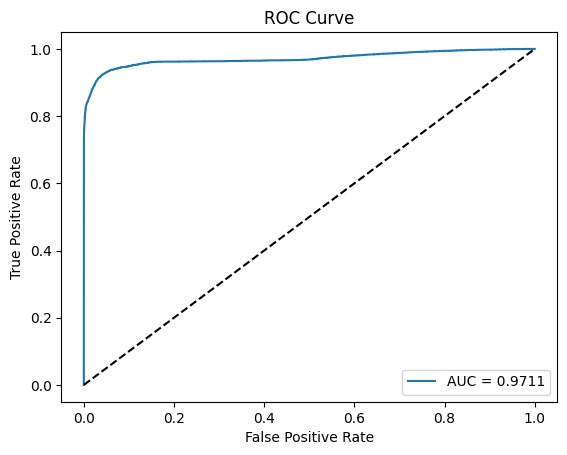

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [75]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [76]:
df_actual_predicted.head()

index  y_actual  y_pred_proba  Cumulative N Population  Cumulative N Bad  \
0  342832         0      0.022447                        1                 0   
1  270060         0      0.022606                        2                 0   
2  364910         0      0.022741                        3                 0   
3  291345         0      0.023032                        4                 0   
4  130525         0      0.023041                        5                 0   

   Cumulative N Good  Cumulative Perc Population  Cumulative Perc Bad  \
0                  1                    0.000011                  0.0   
1                  2                    0.000021                  0.0   
2                  3                    0.000032                  0.0   
3                  4                    0.000043                  0.0   
4                  5                    0.000054                  0.0   

   Cumulative Perc Good  
0              0.000012  
1              0.000024  
2              0.000036  
3              0.000048  
4              0.000060

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.8825')

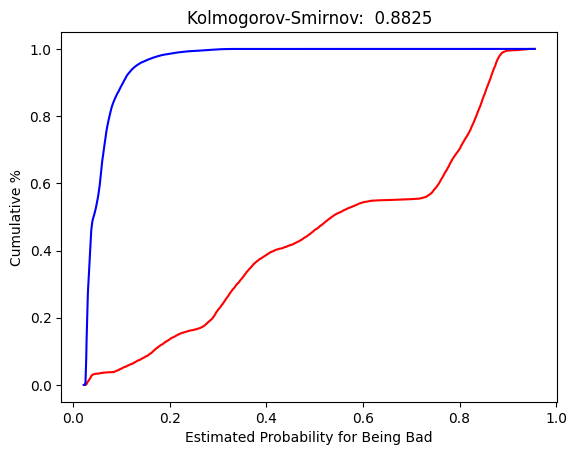

In [77]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

### K-Fold

# MODELING

### Random Forest Classifier